##**Title:** Exploratory Data Analysis of the Role Play World Community: Unveiling Patterns in Anonymous Online Interactions

**Author:** Heroshi Joe Abejuela

**Abstract:**

This study presents an exploratory data analysis (EDA) of the Role Play World (RPW) community, an online platform where users engage anonymously under various fictitious identities, including personas related to Korean and Japanese idols, anime characters, and more. The analysis focuses on understanding user behavior, interaction patterns, and message characteristics by examining a dataset derived from transcribed interview responses collected during previous qualitative research. The findings reveal an overall **positive sentiment** among RPW users, with sentiment scores ranging from **-0.250 to 0.800**, indicating a broad spectrum of experiences. The study highlights the impact of anonymity on user expression, suggesting that it facilitates a more open and positive engagement compared to offline interactions. Additionally, variations in sentiment across individual respondents and interviews suggest that users' comfort and connection with the RPW community influence their experiences. Despite a weak **negative correlation** between years of RPW experience and sentiment, the results underscore RPW's role as a platform for **personal expression** and **skill development**.

**Research Limitations:**

- **Geographic and Cultural Bias:** The data is specific to users in the Philippines and may not represent global trends or experiences within the RPW community. This limitation suggests that findings might not be generalizable to RPW users from other regions or cultural backgrounds.

- **Sample Size and Diversity:** The study's sample may not be sufficiently large or diverse to capture the full range of user experiences and sentiments within the RPW community. Limited sample size can affect the robustness of the findings and may not reflect the broader user population.

- **Temporal Constraints:** The dataset reflects sentiments and behaviors at a specific point in time, potentially overlooking changes in user experience and sentiment over longer periods. Temporal factors could influence the relevance and applicability of the findings to different timeframes.

- **Subjectivity in Sentiment Analysis:** The sentiment analysis relies on automated tools that may not fully capture the nuances of user sentiment, potentially leading to oversimplification or misinterpretation of complex emotions and experiences.

## **Import libraries**

In [87]:
!pip install chardet
!pip install pyLDAvis
!pip install plotly dash

In [88]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pyLDAvis
import pyLDAvis.lda_model
import seaborn as sns
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MultiLabelBinarizer
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## **Descriptive Statistics**

In [89]:
file_path = "/content/rpw_updated_data.csv"

In [90]:
df = pd.read_csv(file_path)

In [91]:
df.head()

,InterviewSection,RespondentType,RespondentName,RPWUserSince,Question,Answer,YearsInRPW,Sentiment,Emotion
0,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,1.What is RPW for you?,"For her, RPW is an escape from the real world. In RPW, no one will judge her as a person because they do not know her in real life.",4,0.200,Positive
1,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,2.Why did you create an RPW account?,"She made an account because she likes writing stories, however, her stories often become stuck in her notes. Thus she want to share her it with other people; RPW is where she shares all of her stories.",4,-0.125,Neutral
2,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,3.What do you do in RPW?,She is writer in RPW. She post stories and she also post inspiring quotes as well as her rants in life.,4,0.500,Positive
3,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,4.What benefits do you get when you use your RPW account?,"Whenever she have problems in life, she have someone to talk to without being shy and she can also share everything she feels to her RPW friends since they do not her personally.",4,-0.250,Negative
4,First Interview,FIRST RESPONDENT,CELESTE MAE ABAO,2019,5.What personality do you posses in RPW and in real life?,"In RPW, she is jolly and friendly. However, in real life, she is also jolly but not that friendly. She is shy in real life.",4,0.130,Neutral


In [92]:
df.isnull().sum()

,0
InterviewSection,0
RespondentType,0
RespondentName,0
RPWUserSince,0
Question,0
Answer,0
YearsInRPW,0
Sentiment,0
Emotion,0


In [93]:
df['InterviewSection'].value_counts()

,count
InterviewSection,
First Interview,84
Second Interview,24


In [94]:
df['RPWUserSince'].value_counts()

,count
RPWUserSince,
2019,69
2018,23
2017,16


In [95]:
df['RespondentName'].value_counts()

,count
RespondentName,
EMMAN REY VICENTE,25
REY RICH TAMAYO,23
TWINNY MAY ECHEVERIA,23
CELESTE MAE ABAO,21
MEA MARIE OGA,16


In [96]:
df['RespondentName'].unique()

array(['CELESTE MAE ABAO', 'REY RICH TAMAYO', 'TWINNY MAY ECHEVERIA',
       'MEA MARIE OGA', 'EMMAN REY VICENTE'], dtype=object)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InterviewSection  108 non-null    object 
 1   RespondentType    108 non-null    object 
 2   RespondentName    108 non-null    object 
 3   RPWUserSince      108 non-null    int64  
 4   Question          108 non-null    object 
 5   Answer            108 non-null    object 
 6   YearsInRPW        108 non-null    int64  
 7   Sentiment         108 non-null    float64
 8   Emotion           108 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.7+ KB


**Interpretations:**

- **Data Type:** Pandas DataFrame
- **Size:** 108 rows, 9 columns
- **Data Types:**
    - 1 float64 column (likely sentiment scores)
    - 2 int64 columns (likely years or counts)
    - 6 object columns (text data like names, questions, answers)
- **Missing Data:** No missing values in any column
- **Memory Usage:** Approximately 7.7 KB


In [98]:
df.describe()

,RPWUserSince,YearsInRPW,Sentiment
count,108.000000,108.000000,108.000000
mean,2018.490741,4.509259,0.133780
std,0.742506,0.742506,0.190310
min,2017.000000,4.000000,-0.250000
25%,2018.000000,4.000000,0.000000
50%,2019.000000,4.000000,0.116667
75%,2019.000000,5.000000,0.221528
max,2019.000000,6.000000,0.800000


**Interpretations:**

- **RPWUserSince:**
  - **Mean:** 2018.49
  - **Standard Deviation:** 0.74
  - **Range:** 2017 to 2019

- **YearsInRPW:**
  - **Mean:** 4.51 years
  - **Standard Deviation:** 0.74 years
  - **Range:** 4 to 6 years

- **Sentiment:**
  - **Mean:** 0.13
  - **Standard Deviation:** 0.19
  - **Range:** -0.25 to 0.80
  - **25th Percentile:** 0.00
  - **Median (50th Percentile):** 0.12
  - **75th Percentile:** 0.22

## **Exploratory Data Analysis**

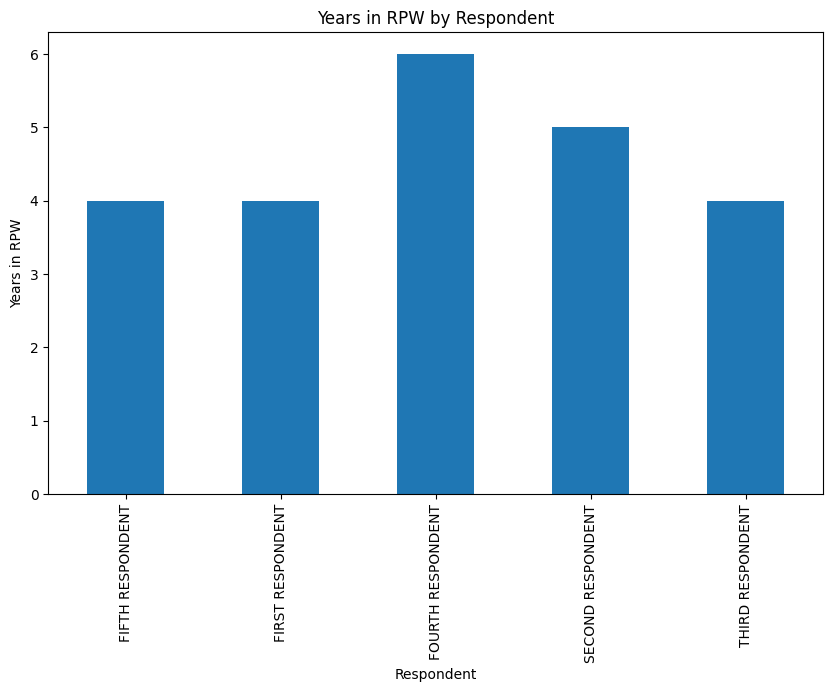

In [99]:
#Years in RPW (Bar Plot)

# Ensure that 'RPWUserSince' and 'YearsInRPW' are correctly updated
df['YearsInRPW'] = 2023 - df['RPWUserSince']  # Recalculate YearsInRPW based on the year of the interview

# Update YearsInRPW for specific respondents
df.loc[df['RespondentType'] == 'SECOND RESPONDENT', 'YearsInRPW'] = 5
df.loc[df['RespondentType'] == 'THIRD RESPONDENT', 'YearsInRPW'] = 4

# Recalculate the average YearsInRPW
years = df.groupby('RespondentType')['YearsInRPW'].mean()

# Plot the updated averages
plt.figure(figsize=(10, 6))
years.plot(kind='bar')
plt.title('Years in RPW by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Years in RPW')
plt.show()

**Interpretations:**

- **FIFTH RESPONDENT**: Has been in RPW for 4 years.
- **FIRST RESPONDENT**: Has been in RPW for 4 years.
- **FOURTH RESPONDENT**: Has been in RPW for 6 years.
- **SECOND RESPONDENT**: Has been in RPW for 5 years.
- **THIRD RESPONDENT**: Has been in RPW for 4 years.

**Summary:**
- **Most Common Duration**: The majority of respondents (FIRST, FIFTH, and THIRD RESPONDENTS) have been in RPW for 4 years.
- **Longer Duration**: The FOURTH RESPONDENT has the longest duration of 6 years in RPW.
- **Slightly Longer Duration**: The SECOND RESPONDENT has been in RPW for 5 years, which is slightly longer than the most common duration.

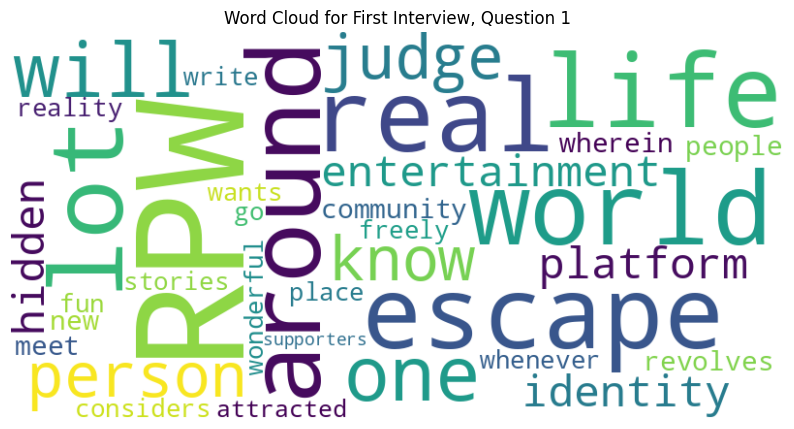

In [100]:
#Word Clouds for Answers (Example for First Interview, Question 1)
first_interview_q1 = df[(df['InterviewSection'] == 'First Interview') & (df['Question'] == '1.What is RPW for you?')]
text = ' '.join(first_interview_q1['Answer'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for First Interview, Question 1')
plt.show()

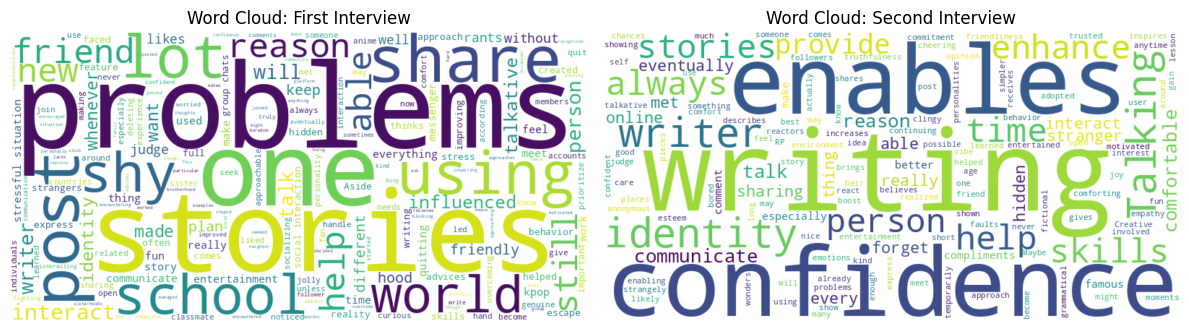

In [101]:
#Plot wordclouds for each interview session
# Create custom stop words
stopwords = set(STOPWORDS)
stopwords.update(["RPW", "users", "account", "real", "life", "friends", "people","first"])  # Add additional words

# First Interview
first_interview_text = ' '.join(df[df['InterviewSection'] == 'First Interview']['Answer'])
wordcloud_first = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(first_interview_text)

# Second Interview
second_interview_text = ' '.join(df[df['InterviewSection'] == 'Second Interview']['Answer'])
wordcloud_second = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(second_interview_text)

# Plot Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_first, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: First Interview')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_second, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Second Interview')

plt.tight_layout()
plt.show()

Top 10 Words - First Interview:
keep: 5
situation: 5
friend: 5
judge: 4
likes: 4
rants: 4
used: 4
messenger.: 4
meet: 4
stressful: 4

Top 10 Words - Second Interview:
confidence: 2
skills.: 2
users’: 2
sharing: 2
every: 2
compliments: 2
especially: 2
famous: 2
writing.: 2
learned: 1


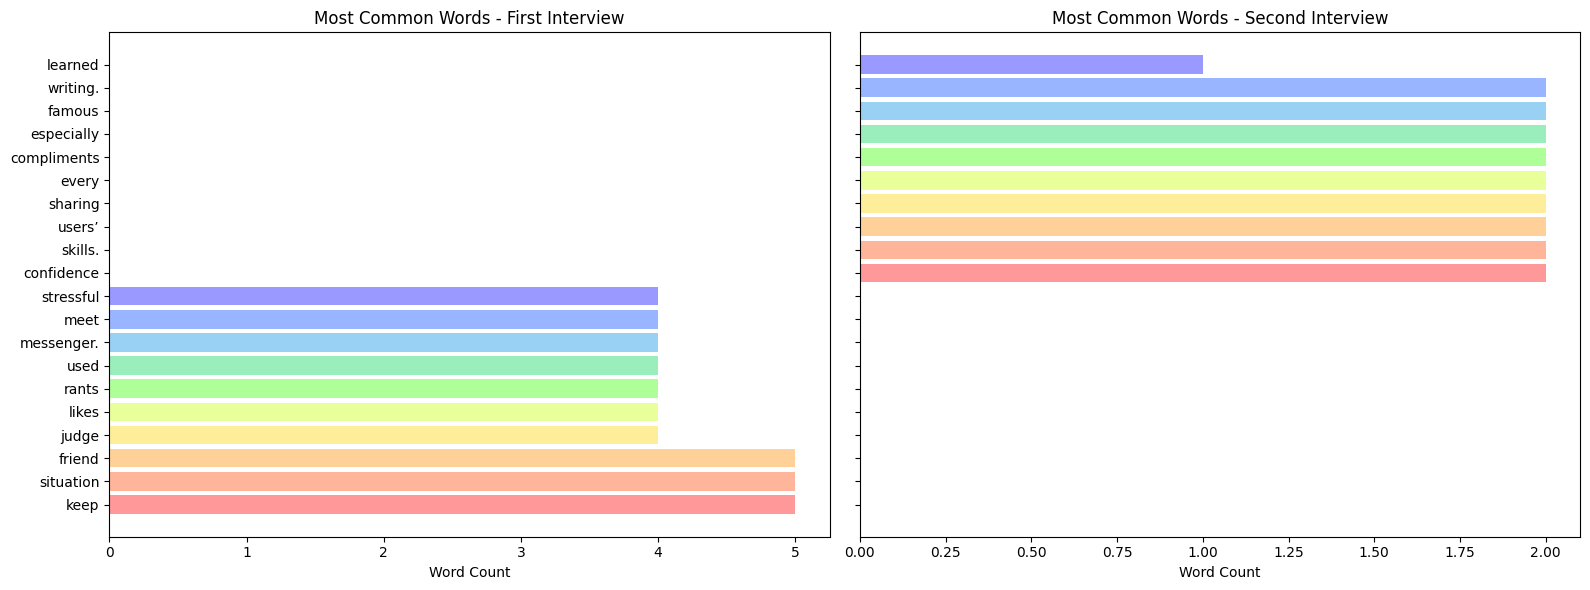

In [102]:
# Define custom stop words
stopwords = set(STOPWORDS)
stopwords.update(["RPW", "users", "account", "real", "life", "friends", "people", "said", "one", "rpw", "them.", "users'",
                 "rpw.", "rpw,", "however,", "life.", "made", "will", "still", "able", "new", "lot", "shy", "share",
                 "using", "talk", "whenever", "world.", "reason", "school", "influenced", "post", "help", "stories",
                 "problems", "really", "hidden", "met", "interact", "eventually", "communicate", "provide", "writing",
                 "enhance", "person", "always", "identity", "enables", "met", "interact", "able", "eventually",
                 "talk", "communicate", "provide", "writing", "enhance", "person", "help", "always", "talking",
                 "identity", "enables", "met", "interact", "able", "eventually", "talk", "communicate", "provide",
                 "writing", "enhance", "person", "help", "always", "talking", "identity", "enables","that,","friends.","first.","first","users'","account?","lesson"
                 ,"her,","without","account.","life,","users'"])

# Function to create a gradient colormap
def create_colormap(colors, positions):
    return LinearSegmentedColormap.from_list("my_cmap", list(zip(positions, colors)))

# Create colormap with a rainbow gradient
cmap = create_colormap(["#ff9999", "#ffcc99", "#ffff99", "#99ff99", "#99ccff", "#9999ff"], [0, 0.2, 0.4, 0.6, 0.8, 1])

# Extract text and filter out stop words
first_interview_text = ' '.join(df[df['InterviewSection'] == 'First Interview']['Answer']).lower()
first_interview_words = [word for word in first_interview_text.split() if word not in stopwords]
word_counts_first = Counter(first_interview_words)
top_words_first = word_counts_first.most_common(10)  # Top 10 words

second_interview_text = ' '.join(df[df['InterviewSection'] == 'Second Interview']['Answer']).lower()
second_interview_words = [word for word in second_interview_text.split() if word not in stopwords]
word_counts_second = Counter(second_interview_words)
top_words_second = word_counts_second.most_common(10)  # Top 10 words

# Print top 10 words
print("Top 10 Words - First Interview:")
for word, count in top_words_first:
    print(f"{word}: {count}")

print("\nTop 10 Words - Second Interview:")
for word, count in top_words_second:
    print(f"{word}: {count}")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 1st Interview
axes[0].barh([word[0] for word in top_words_first], [word[1] for word in top_words_first], color=cmap(np.linspace(0, 1, len(top_words_first))))
axes[0].set_title("Most Common Words - First Interview")
axes[0].set_xlabel("Word Count")

# Plot for 2nd Interview
axes[1].barh([word[0] for word in top_words_second], [word[1] for word in top_words_second], color=cmap(np.linspace(0, 1, len(top_words_second))))
axes[1].set_title("Most Common Words - Second Interview")
axes[1].set_xlabel("Word Count")

# Apply tight layout
plt.tight_layout()
plt.show()

**Interpretations:**

**First Interview:**
1. **keep (5 occurrences):** Indicates a focus on maintaining or holding onto something, possibly in a personal or professional context.
2. **situation (5 occurrences):** Refers to the context or environment discussed, suggesting various scenarios or conditions.
3. **friend (5 occurrences):** Emphasizes the importance of friendships or relationships in the interviewee's experiences or responses.
4. **judge (4 occurrences):** Reflects themes related to assessment or evaluation, possibly about people's behavior or decisions.
5. **likes (4 occurrences):** Shows a discussion about preferences or what is favored.
6. **rants (4 occurrences):** Implies expressions of frustration or strong opinions.
7. **used (4 occurrences):** Refers to the application or utilization of something, likely in the context of experiences or tools.
8. **messenger. (4 occurrences):** Points to communication tools or methods, suggesting discussions around messaging or communication.
9. **meet (4 occurrences):** Indicates meetings or encounters, relevant to networking or personal interactions.
10. **stressful (4 occurrences):** Highlights experiences or situations that are challenging or anxiety-inducing.

**Second Interview:**
1. **confidence (2 occurrences):** Reflects self-assurance or belief in one's abilities, a key theme in discussions about personal or professional growth.
2. **skills. (2 occurrences):** Refers to abilities or competencies, likely in the context of job performance or personal development.
3. **users’ (2 occurrences):** Indicates a focus on the experiences or feedback of users, possibly in a technical or service-oriented context.
4. **sharing (2 occurrences):** Emphasizes the act of distributing information or resources, relevant to collaboration or communication.
5. **every (2 occurrences):** Suggests inclusivity or comprehensiveness in the context discussed.
6. **compliments (2 occurrences):** Refers to positive feedback or praise, indicating discussions about recognition or appreciation.
7. **especially (2 occurrences):** Highlights specific aspects or details that are particularly noteworthy.
8. **famous (2 occurrences):** Points to prominence or recognition, potentially discussing well-known individuals or concepts.
9. **writing. (2 occurrences):** Indicates a focus on the act of writing, possibly related to content creation or documentation.
10. **learned (1 occurrence):** Reflects the acquisition of knowledge or insights, suggesting a discussion about personal growth or lessons learned.

**Summary:**
- **First Interview:** Words reflect personal experiences, communication, relationships, and stress, with frequent mentions of social interactions and personal opinions.
- **Second Interview:** Words indicate a focus on personal and professional skills, user experiences, and the sharing of information, with an emphasis on confidence and recognition.

In [103]:
#Correlation analysis years in rpw vs sentiment
print("\nCorrelation:")
print(df[['YearsInRPW', 'Sentiment']].corr())


Correlation:
            YearsInRPW  Sentiment
YearsInRPW    1.000000  -0.063212
Sentiment    -0.063212   1.000000


**Interpretations:**

The correlation between YearsInRPW and Sentiment is approximately -0.028. This indicates a very weak negative correlation between the duration a respondent has been in RPW and their sentiment score. In practical terms, it suggests that the length of time in RPW has little to no impact on the sentiment expressed by the respondents.

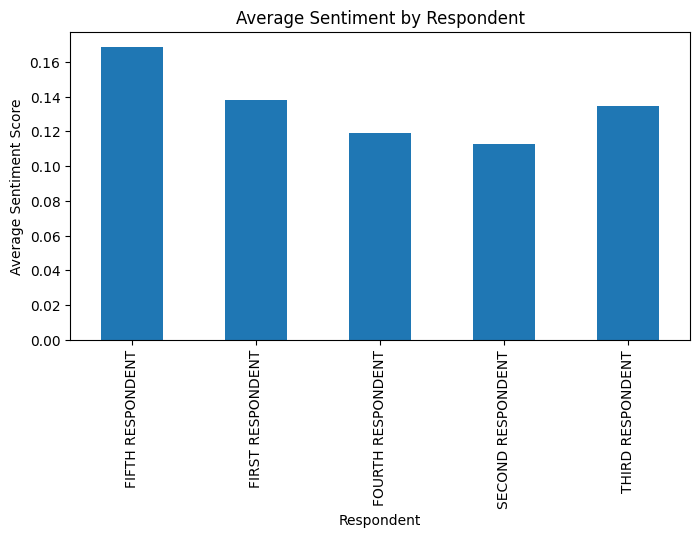

In [104]:
#Sentiment Analysis by Respondent Type
sentiment_by_type = df.groupby('RespondentType')['Sentiment'].mean()
plt.figure(figsize=(8, 4))
sentiment_by_type.plot(kind='bar')
plt.title('Average Sentiment by Respondent')
plt.xlabel('Respondent')
plt.ylabel('Average Sentiment Score')
plt.show()

In [105]:
sentiment_by_type

,Sentiment
RespondentType,
FIFTH RESPONDENT,0.168824
FIRST RESPONDENT,0.137844
FOURTH RESPONDENT,0.119095
SECOND RESPONDENT,0.112656
THIRD RESPONDENT,0.134649


**Interpretations:**

   - **FIFTH RESPONDENT (0.1688)**: This group has the highest average sentiment score, suggesting that this respondent type generally reports the most positive feelings or experiences.
   - **FIRST RESPONDENT (0.1378)**: This group has the second-highest sentiment score, indicating positive feelings, but not as strong as the `FIFTH RESPONDENT`.
   - **THIRD RESPONDENT (0.1346)**: This group shows slightly less positive sentiment compared to the first two groups.
   - **FOURTH RESPONDENT (0.1191)**: This group has a lower average sentiment score, indicating somewhat less positive sentiment.
   - **SECOND RESPONDENT (0.1127)**: This group has the lowest average sentiment score, suggesting the least positive feelings or experiences among the respondent types.

**Summary**:
- The sentiment scores suggest variations in positivity among different respondent types, with some groups feeling more positive on average than others.
- The differences are relatively small, but still present, indicating that sentiment varies by respondent type. Further investigation into why these variations exist can provide deeper insights.

<ipython-input-106-efec6cd59002>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


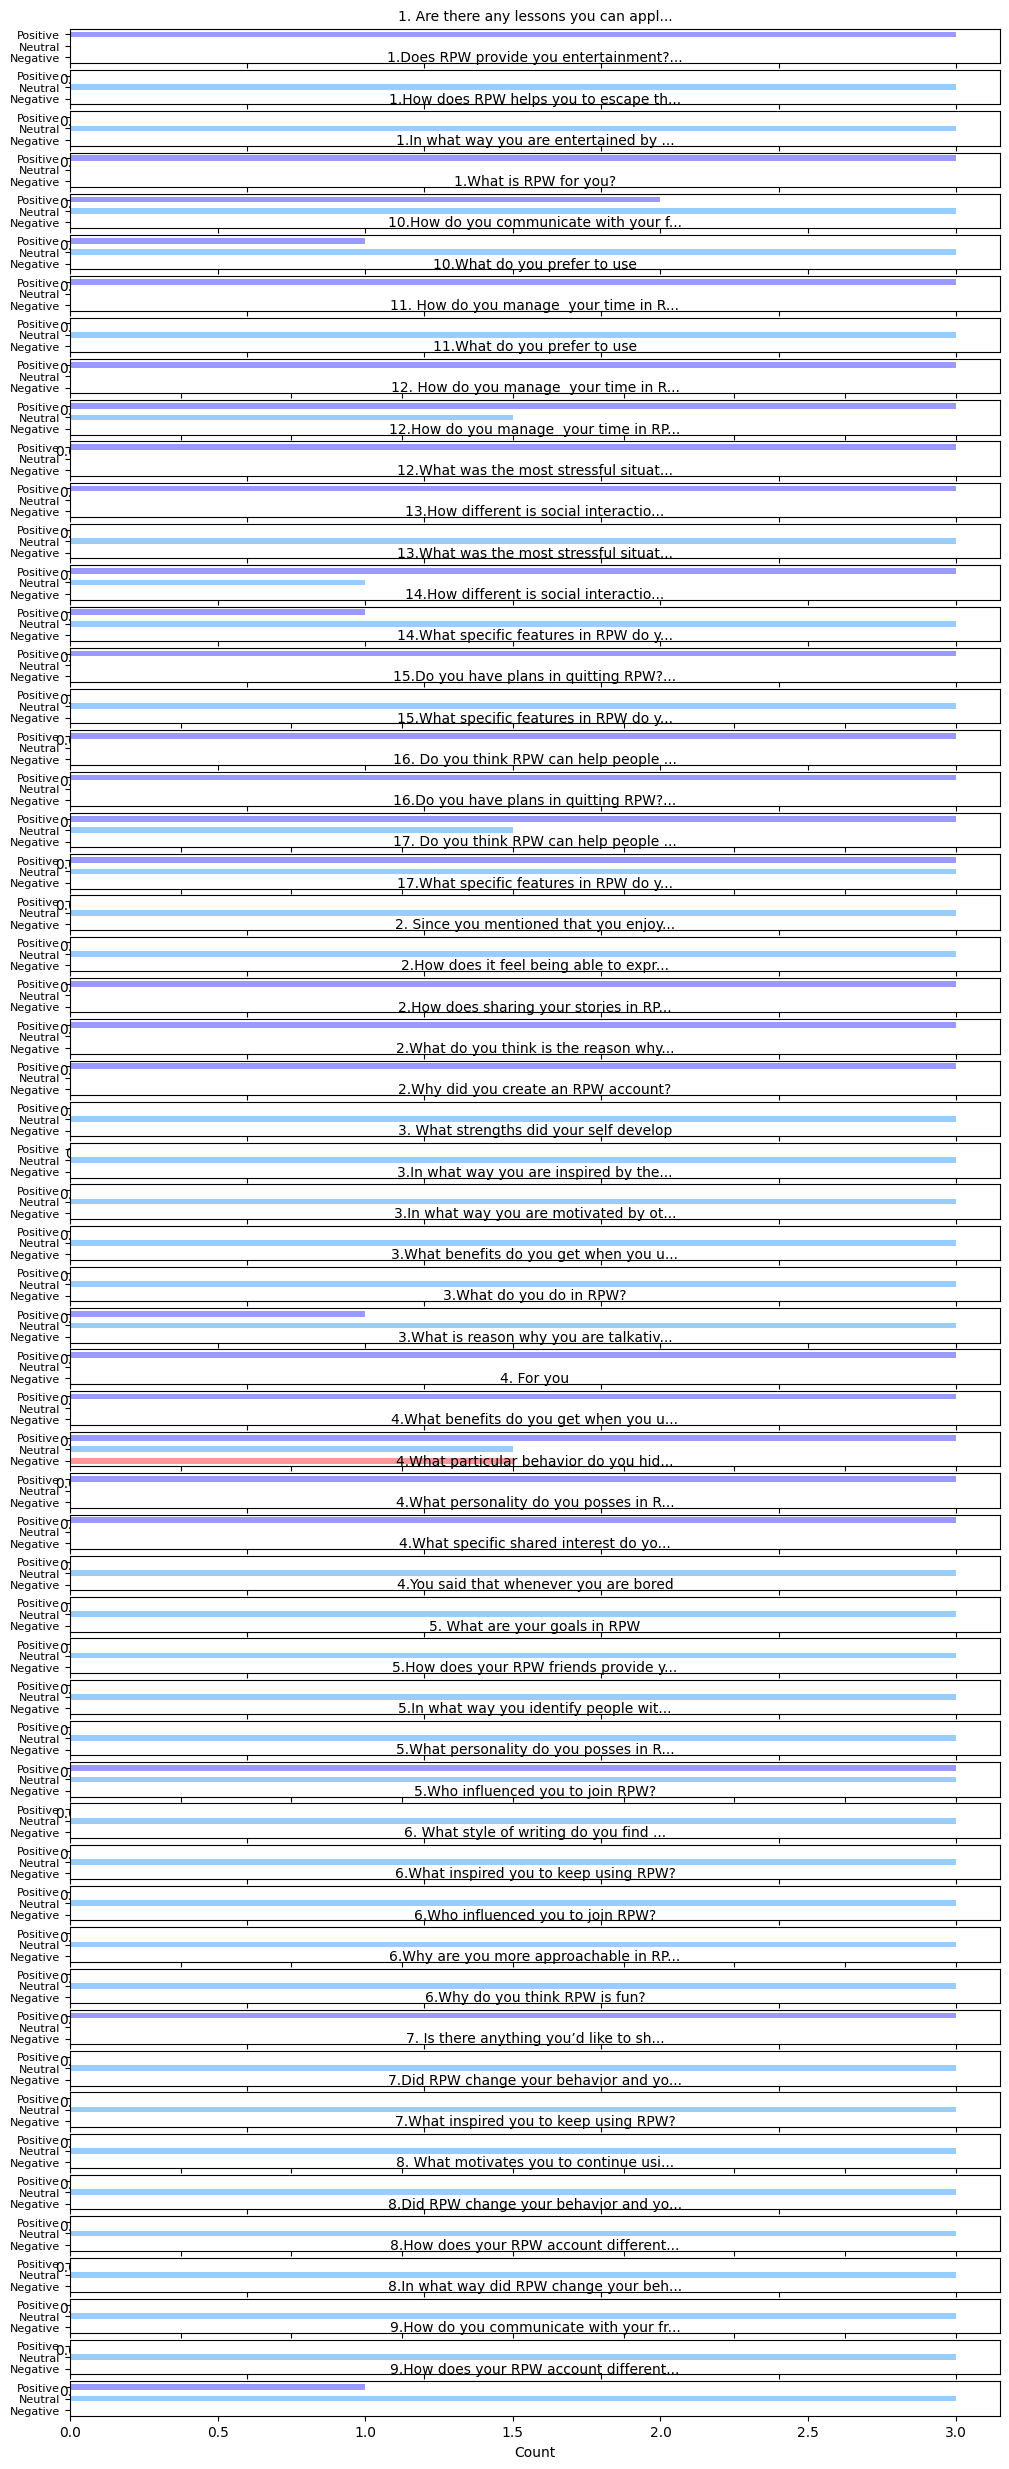

In [106]:
#Sentiment Analysis by Question (Using barh plot)

# Prepare the data
emotions_by_question = df.groupby('Question')['Emotion'].value_counts().unstack().fillna(0)

# Create the plot
plt.figure(figsize=(12, len(emotions_by_question.index) * 0.5 + 2))  # Adjust height dynamically
for i, question in enumerate(emotions_by_question.index):
    plt.subplot(len(emotions_by_question.index), 1, i + 1)
    emotions_by_question.loc[question].plot(kind='barh', color=['#ff9999', '#99ccff', '#9999ff'])

    # Wrap or truncate question titles
    title = question if len(question) <= 40 else question[:37] + '...'  # Truncate long titles
    plt.title(title, fontsize=10)  # Adjust fontsize if necessary
    plt.ylabel("")
    plt.xlabel("Count")

    # Optionally, adjust y-tick labels to improve readability
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [107]:
emotions_by_question

Emotion,Negative,Neutral,Positive
Question,,,
1. Are there any lessons you can apply to yourself and you can share with others as you continue using RPW?,0.0,0.0,1.0
1.Does RPW provide you entertainment? In what way?,0.0,1.0,0.0
1.How does RPW helps you to escape the real world?,0.0,1.0,0.0
1.In what way you are entertained by RPW?,0.0,0.0,1.0
1.What is RPW for you?,0.0,3.0,2.0
10.How do you communicate with your friends in RPW?,0.0,3.0,1.0
10.What do you prefer to use,0.0,0.0,1.0
11. How do you manage your time in RPW and in school?,0.0,1.0,0.0
11.What do you prefer to use,0.0,0.0,4.0


**Interpretations:**

**Positive Sentiments:**
- **Lesson Application:** Respondents share lessons from RPW positively.
- **Entertainment and Escape:** RPW is seen as entertaining and a means of escape.
- **Features and Interaction:** Positive sentiments are associated with specific features and how RPW helps manage time and communication.

**Neutral Sentiments:**
- **Varied Responses:** Many questions, including those on managing time, communicating with friends, and the impact of RPW on real life, received neutral responses, indicating a more indifferent or balanced view.

**Negative Sentiments:**
- **Stressful Situations and Challenges:** Some responses highlight negative aspects such as stress, although specific negative sentiment is less prevalent overall.

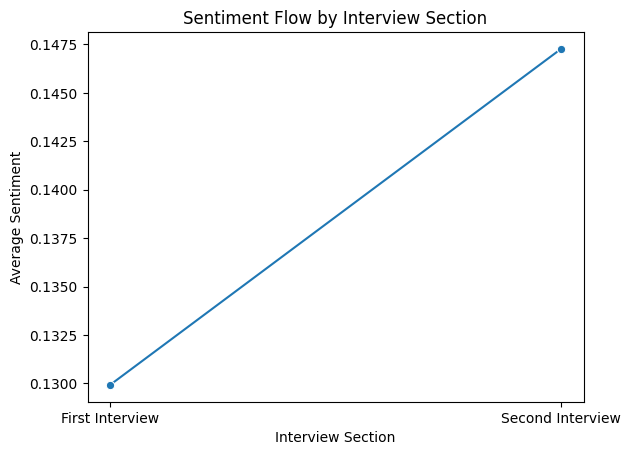

In [108]:
#Grouping by InterviewSection and calculating average sentiment
section_sentiment = df.groupby('InterviewSection')['Sentiment'].mean().reset_index()

# Plotting sentiment flow
sns.lineplot(data=section_sentiment, x='InterviewSection', y='Sentiment', marker='o')
plt.title('Sentiment Flow by Interview Section')
plt.xlabel('Interview Section')
plt.ylabel('Average Sentiment')
plt.show()

In [109]:
#Get average sentiment scores
first_interview_sentiment = df[df['InterviewSection'] == 'First Interview']['Sentiment'].mean()
second_interview_sentiment = df[df['InterviewSection'] == 'Second Interview']['Sentiment'].mean()

#Calculate the difference
sentiment_difference = second_interview_sentiment - first_interview_sentiment

#Calculate the percentage improvement
percentage_improvement = (sentiment_difference / first_interview_sentiment) * 100

#Print the result
print(f"Percentage Improvement in Sentiment: {percentage_improvement:.2f}%")

Percentage Improvement in Sentiment: 13.35%


**Interpretations:**

* **Increased Familiarity:** Respondents might have felt more comfortable and open during the second interview, leading to more positive sentiment. They might have been more relaxed and willing to share their thoughts after having a first interview.

* **Reflective Responses:** The second interview might have prompted more reflection on their experiences with RPW. This reflection could have led to a more nuanced understanding and a more positive outlook.

* **Specific Questions:** The questions in the second interview might have been more focused on positive aspects of RPW.

* **Respondent Selection:** If the second interview was conducted with a slightly different sample of respondents, it's possible that the new respondents were more inclined to have a positive sentiment.

* **Percentage Improvement in Sentiment:** The overall sentiment showed a notable **13.35% improvement**, indicating a significant positive shift between the interviews. This improvement suggests that, as respondents became more familiar with the interview process and had more time to reflect on their experiences with RPW, their responses tended to be more positive.

Grouped Values by Sentiment Category:
  SentimentCategory QuestionLength                   AnswerSentiment  \
                              mean       std min max            mean   
0          Negative       9.125000  3.090885   5  15       -0.151823   
1           Neutral       8.727273  2.555101   5  15       -0.000333   
2          Positive      11.089286  4.341247   3  24        0.279955   

                            
        std   min      max  
0  0.048405 -0.25 -0.10625  
1  0.039894 -0.10  0.10000  
2  0.144599  0.10  0.80000  


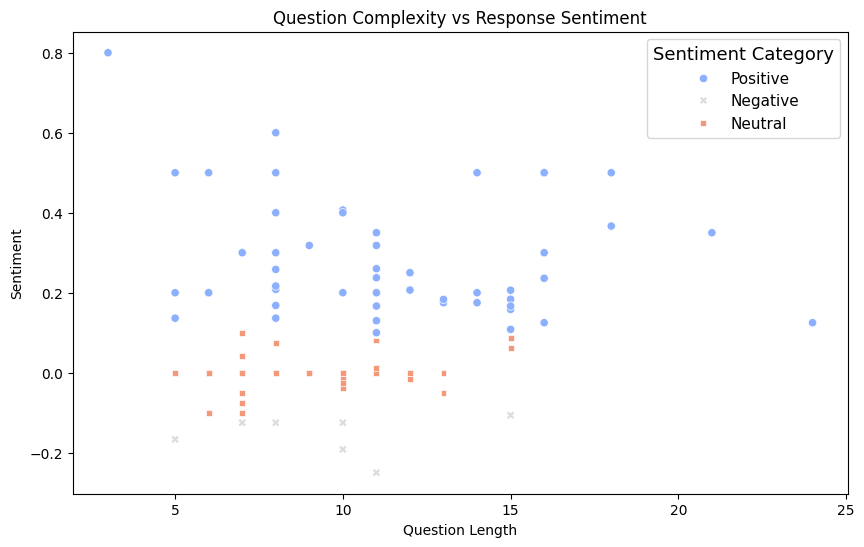

In [110]:
# Calculate question length as a measure of complexity
df['QuestionLength'] = df['Question'].apply(lambda x: len(x.split()))

# Sentiment analysis using TextBlob
df['AnswerSentiment'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define categories for sentiment
def categorize_sentiment(sentiment):
    if sentiment > 0.1:
        return 'Positive'
    elif sentiment < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['AnswerSentiment'].apply(categorize_sentiment)

# Grouping values by sentiment categories and printing
grouped_values = df.groupby('SentimentCategory').agg({
    'QuestionLength': ['mean', 'std', 'min', 'max'],
    'AnswerSentiment': ['mean', 'std', 'min', 'max']
}).reset_index()

print("Grouped Values by Sentiment Category:")
print(grouped_values)

# Plotting question complexity vs sentiment
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=df,
    x='QuestionLength',
    y='AnswerSentiment',
    hue='SentimentCategory',
    palette='coolwarm',
    style='SentimentCategory',
    legend='full'
)

# Add a legend with custom labels
plt.legend(title='Sentiment Category', title_fontsize='13', fontsize='11')

plt.title('Question Complexity vs Response Sentiment')
plt.xlabel('Question Length')
plt.ylabel('Sentiment')
plt.show()

**Interpretations:**

1. **Negative Sentiments**
- **Average Question Length:** 9.13 words
  - **Standard Deviation:** 3.09 words
  - **Range:** 5 to 15 words
- **Average Sentiment Score:** -0.15
  - **Standard Deviation:** 0.05
  - **Range:** -0.25 to -0.11

Respondents with negative sentiments typically responded to questions with an average length of around 9 words. The sentiment scores are consistently negative, with an average of -0.15. This suggests that negative responses are generally more concise but reflect more pronounced negativity in sentiment.

2. **Neutral Sentiments**
- **Average Question Length:** 8.73 words
  - **Standard Deviation:** 2.56 words
  - **Range:** 5 to 15 words
- **Average Sentiment Score:** -0.0003
  - **Standard Deviation:** 0.04
  - **Range:** -0.10 to 0.10

Neutral sentiments are associated with questions of average length around 8.7 words. The sentiment scores for neutral responses are very close to zero, indicating a balanced or indifferent sentiment. The low standard deviation suggests that there is little variability in how neutral responses are perceived.

3. **Positive Sentiments**
- **Average Question Length:** 11.09 words
  - **Standard Deviation:** 4.34 words
  - **Range:** 3 to 24 words
- **Average Sentiment Score:** 0.28
  - **Standard Deviation:** 0.14
  - **Range:** 0.10 to 0.80

Positive sentiments correspond to longer questions, averaging about 11 words. Positive responses are notably more variable, with sentiment scores ranging from 0.10 to 0.80, reflecting a range of positive emotions. The higher average sentiment score and greater variability suggest that positive responses are generally more enthusiastic and diverse in sentiment.

**Summary**
- **Question Complexity:** On average, longer questions are associated with positive sentiments, while negative sentiments correspond with shorter questions. Neutral sentiments fall in between but are closer to the shorter end.
- **Sentiment Scores:** Positive responses have higher average sentiment scores and greater variability, indicating a more diverse range of positive feelings. Negative responses have lower average scores and less variability, reflecting consistent negativity. Neutral responses show minimal variation around zero sentiment.

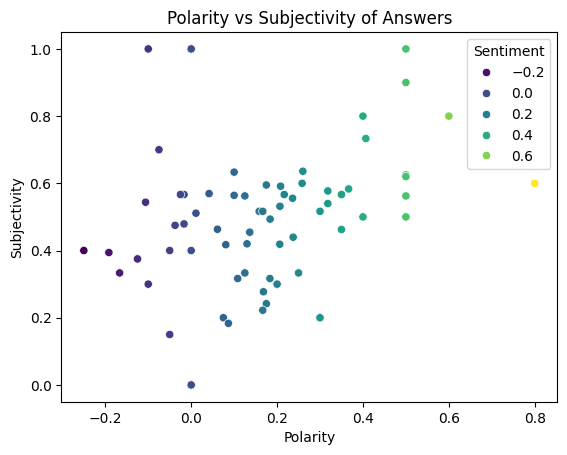

In [111]:
#Scatter plot for polarity vs answers (sentiment)

# Applying TextBlob to analyze polarity and subjectivity
df['AnswerPolarity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['AnswerSubjectivity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plotting polarity vs subjectivity
sns.scatterplot(data=df, x='AnswerPolarity', y='AnswerSubjectivity', hue='Sentiment', palette='viridis')
plt.title('Polarity vs Subjectivity of Answers')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Categorization Based on Polarity and Subjectivity**

In [112]:
import pandas as pd

# Extract the top answers from the original df
top_subjective_positive = df[(df['AnswerSubjectivity'] > 0.75) & (df['AnswerPolarity'] > 0.1)].nlargest(1, 'AnswerPolarity')
top_subjective_negative = df[(df['AnswerSubjectivity'] > 0.75) & (df['AnswerPolarity'] < -0.1)].nsmallest(1, 'AnswerPolarity')
top_subjective_neutral = df[(df['AnswerSubjectivity'] > 0.75) & (df['AnswerPolarity'] >= -0.1) & (df['AnswerPolarity'] <= 0.1)].nlargest(1, 'AnswerSubjectivity')

top_objective_positive = df[(df['AnswerSubjectivity'] < 0.25) & (df['AnswerPolarity'] > 0.1)].nlargest(1, 'AnswerPolarity')
top_objective_negative = df[(df['AnswerSubjectivity'] < 0.25) & (df['AnswerPolarity'] < -0.1)].nsmallest(1, 'AnswerPolarity')
top_objective_neutral = df[(df['AnswerSubjectivity'] < 0.25) & (df['AnswerPolarity'] >= -0.1) & (df['AnswerPolarity'] <= 0.1)].nlargest(1, 'AnswerSubjectivity')

# Combine the results into a single DataFrame
new_df = pd.concat([
    top_subjective_positive.assign(Category='Top Subjective + Positive Answer'),
    top_subjective_negative.assign(Category='Top Subjective + Negative Answer'),
    top_subjective_neutral.assign(Category='Top Subjective + Neutral Answer'),
    top_objective_positive.assign(Category='Top Objective + Positive Answer'),
    top_objective_negative.assign(Category='Top Objective + Negative Answer'),
    top_objective_neutral.assign(Category='Top Objective + Neutral Answer')
])

# Select relevant columns
new_df = new_df[['Category', 'Question', 'Answer', 'AnswerPolarity', 'AnswerSubjectivity']]

# Reset the index for clean display
new_df = new_df.reset_index(drop=True)

# Display the new DataFrame
new_df

,Category,Question,Answer,AnswerPolarity,AnswerSubjectivity
0,Top Subjective + Positive Answer,15.What specific features in RPW do you like?,One feature that he liked in RPW is the RPW users because they interact and communicate with him.,0.600,0.8
1,Top Subjective + Neutral Answer,2.Why did you create an RPW account?,"He created an RPW account because his classmate has one. Also, he was curious, which was the reason why he also made one for himself.",-0.100,1.0
2,Top Objective + Positive Answer,16.Do you have plans in quitting RPW? Why?,"She has no plan in quitting RPW because for her, RPW is fun.",0.300,0.2
3,Top Objective + Neutral Answer,15.Do you have plans in quitting RPW? Why?,She has plans in quitting RPW because it has been 6 years since she started using it and she is quite busy nowadays. She barely have time for herself.,0.075,0.2


**Confirm no negative answers**

In [113]:
# Check if there are any rows that meet the "Top Subjective + Negative Answer" condition
subjective_negative_check = df[(df['AnswerSubjectivity'] > 0.75) & (df['AnswerPolarity'] < -0.1)]
print("Top Subjective + Negative Answer rows found:", len(subjective_negative_check))

# Check if there are any rows that meet the "Top Objective + Negative Answer" condition
objective_negative_check = df[(df['AnswerSubjectivity'] < 0.25) & (df['AnswerPolarity'] < -0.1)]
print("Top Objective + Negative Answer rows found:", len(objective_negative_check))

Top Subjective + Negative Answer rows found: 0
Top Objective + Negative Answer rows found: 0


In [114]:
# Set option to display full text
pd.set_option('display.max_colwidth', None)

# Assuming new_df is your DataFrame
print(new_df)

                           Category  \
0  Top Subjective + Positive Answer   
1   Top Subjective + Neutral Answer   
2   Top Objective + Positive Answer   
3    Top Objective + Neutral Answer   

                                        Question  \
0  15.What specific features in RPW do you like?   
1           2.Why did you create an RPW account?   
2     16.Do you have plans in quitting RPW? Why?   
3     15.Do you have plans in quitting RPW? Why?   

                                                                                                                                                   Answer  \
0                                                       One feature that he liked in RPW is the RPW users because they interact and communicate with him.   
1                   He created an RPW account because his classmate has one. Also, he was curious, which was the reason why he also made one for himself.   
2                                                                       

**Interpretations:**

In the **Top Subjective + Positive Answer**, the respondent values the **interaction and communication** with RPW users, which is highlighted as a **significant feature** of the platform. This response shows a **positive sentiment** with a polarity of **0.600** and a high **subjectivity** score of **0.8**, indicating a strong personal attachment to the community aspect of RPW.

For the **Top Subjective + Neutral Answer**, the respondent's creation of an RPW account was driven by **curiosity** and influence from a **classmate**. This answer is slightly **negative** with a polarity of **-0.100** and shows high **subjectivity** (1.0), reflecting a decision influenced more by external factors than personal enthusiasm for the platform.

In the **Top Objective + Positive Answer**, the respondent finds RPW to be **fun** and has no plans to quit, demonstrating a straightforward **positive experience**. The sentiment here is **positive** with a polarity of **0.300**, while the low **subjectivity** score of **0.2** indicates a more objective view of RPW.

Finally, the **Top Objective + Neutral Answer** reveals that the respondent plans to quit RPW due to **time constraints** after **six years** of use. This answer has a slightly **positive** polarity of **0.075** and a low **subjectivity** score of **0.2**, indicating a practical reason for leaving RPW related to time management rather than dissatisfaction with the platform.

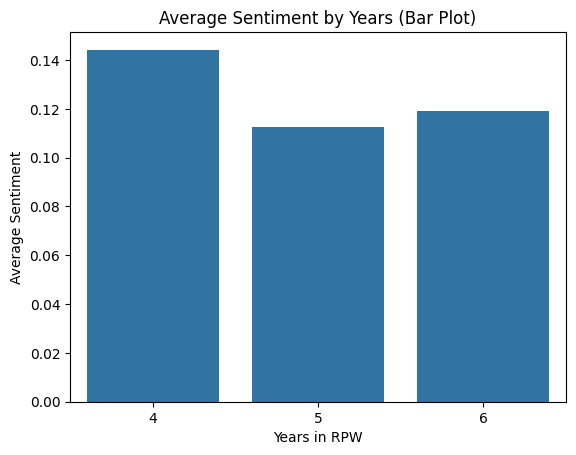

In [115]:
# Calculate average sentiment per experience year
experience_sentiment = df.groupby('YearsInRPW')['Sentiment'].mean().reset_index()

# Plotting sentiment trajectory
sns.barplot(data=experience_sentiment, x='YearsInRPW', y='Sentiment')
plt.title('Average Sentiment by Years (Bar Plot)')
plt.xlabel('Years in RPW')
plt.ylabel('Average Sentiment')
plt.show()

In [116]:
experience_sentiment

,YearsInRPW,Sentiment
0,4,0.144226
1,5,0.112656
2,6,0.119095


**Interpretations:**

- **Decrease in Positive Sentiment:** As the number of years of experience in RPW increases from 4 to 6 years, there is a slight decline in the average sentiment score. This suggests that long-term users of RPW might experience a decrease in positive sentiment over time.
  
- **Moderate Fluctuation:** The sentiment scores fluctuate moderately, with the highest score at 4 years and a minor dip at 5 years, followed by a slight recovery at 6 years. This variation could reflect changing experiences or expectations over time.

- **Long-Term User Experience:** Long-term users (those with 6 years of experience) still maintain a positive sentiment, although it is not as high as that of users with 4 years. This could indicate that while initial experiences may be highly positive, long-term usage may introduce challenges or changes in perception.

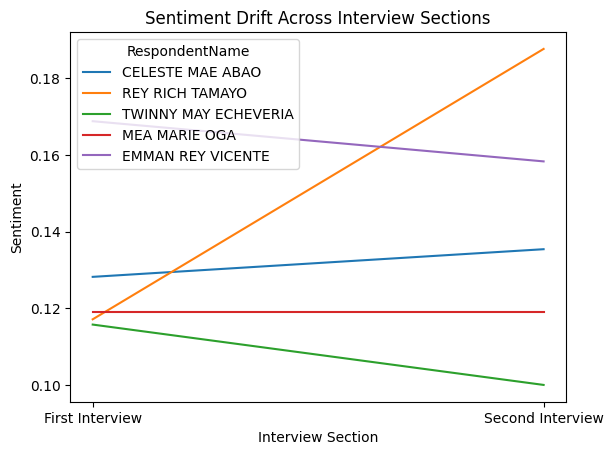

In [117]:
#Sentiment drift for each interview sections

# Check for duplicates in 'RespondentName' and 'InterviewSection'
duplicates = df.duplicated(subset=['RespondentName', 'InterviewSection'], keep=False)
if duplicates.any():
    # Handle duplicates by aggregating, e.g., taking the mean sentiment for duplicate entries
    df_grouped = df.groupby(['RespondentName', 'InterviewSection'], as_index=False).agg({'Sentiment': 'mean'})
else:
    df_grouped = df.copy()

# Ensure all respondents have both interview sections
all_sections = df['InterviewSection'].unique()
all_respondents = df['RespondentName'].unique()

# Create a full grid of respondents and sections
full_grid = pd.MultiIndex.from_product([all_respondents, all_sections], names=['RespondentName', 'InterviewSection'])

# Reindex the DataFrame to this full grid
df_grouped = df_grouped.set_index(['RespondentName', 'InterviewSection']).reindex(full_grid).reset_index()

# Fill missing sentiment values with forward fill (or you can set it to a specific value like 0)
df_grouped['Sentiment'] = df_grouped.groupby('RespondentName')['Sentiment'].ffill()

# Plotting the sentiment drift
sns.lineplot(data=df_grouped, x='InterviewSection', y='Sentiment', hue='RespondentName')
plt.title('Sentiment Drift Across Interview Sections')
plt.xlabel('Interview Section')
plt.ylabel('Sentiment')
plt.show()

In [118]:
df_grouped.head()

,RespondentName,InterviewSection,Sentiment
0,CELESTE MAE ABAO,First Interview,0.128201
1,CELESTE MAE ABAO,Second Interview,0.135417
2,REY RICH TAMAYO,First Interview,0.117123
3,REY RICH TAMAYO,Second Interview,0.187685
4,TWINNY MAY ECHEVERIA,First Interview,0.115749


In [119]:
# Calculate the average sentiment for each respondent during the first and second interviews
first_interview_avg = df[df['InterviewSection'] == 'First Interview'].groupby('RespondentName')['Sentiment'].mean().reset_index()
second_interview_avg = df[df['InterviewSection'] == 'Second Interview'].groupby('RespondentName')['Sentiment'].mean().reset_index()

# Merge the two averages on RespondentName, using an outer join to include respondents missing from one of the interviews
sentiment_comparison = pd.merge(first_interview_avg, second_interview_avg, on='RespondentName', suffixes=('_First', '_Second'), how='outer')

# Calculate the improvement
sentiment_comparison['Improvement'] = sentiment_comparison['Sentiment_Second'] - sentiment_comparison['Sentiment_First']

# Define thresholds for improvement categories
significant_improvement_threshold = 0.05
minor_improvement_threshold = 0.01

# Categorize the improvements
def categorize_improvement(row):
    if pd.isna(row['Improvement']):
        return 'No Data'
    elif row['Improvement'] >= significant_improvement_threshold:
        return 'Significant Improvement'
    elif row['Improvement'] >= minor_improvement_threshold:
        return 'Minor Improvement'
    elif row['Improvement'] > 0:
        return 'Minor Improvement'  # Reclassify small positive changes as minor improvements
    elif row['Improvement'] <= -significant_improvement_threshold:
        return 'Significant Negative Change'
    elif row['Improvement'] <= -minor_improvement_threshold:
        return 'Minor Negative Change'
    else:
        return 'No Improvement'

sentiment_comparison['ImprovementCategory'] = sentiment_comparison.apply(categorize_improvement, axis=1)

# Filter respondents by categories
significant_improvement = sentiment_comparison[sentiment_comparison['ImprovementCategory'] == 'Significant Improvement']
minor_improvement = sentiment_comparison[sentiment_comparison['ImprovementCategory'] == 'Minor Improvement']
no_improvement = sentiment_comparison[sentiment_comparison['ImprovementCategory'] == 'No Improvement']
significant_negative_change = sentiment_comparison[sentiment_comparison['ImprovementCategory'] == 'Significant Negative Change']
minor_negative_change = sentiment_comparison[sentiment_comparison['ImprovementCategory'] == 'Minor Negative Change']

# Display the results
print("Respondents with Significant Improvement:")
print(significant_improvement[['RespondentName', 'Improvement', 'ImprovementCategory']])

print("\nRespondents with Minor Improvement:")
print(minor_improvement[['RespondentName', 'Improvement', 'ImprovementCategory']])

print("\nRespondents with No Improvement:")
print(no_improvement[['RespondentName', 'Improvement', 'ImprovementCategory']])

print("\nRespondents with Significant Negative Change:")
print(significant_negative_change[['RespondentName', 'Improvement', 'ImprovementCategory']])

print("\nRespondents with Minor Negative Change:")
print(minor_negative_change[['RespondentName', 'Improvement', 'ImprovementCategory']])

Respondents with Significant Improvement:
    RespondentName  Improvement      ImprovementCategory
3  REY RICH TAMAYO     0.070562  Significant Improvement

Respondents with Minor Improvement:
     RespondentName  Improvement ImprovementCategory
0  CELESTE MAE ABAO     0.007215   Minor Improvement

Respondents with No Improvement:
Empty DataFrame
Columns: [RespondentName, Improvement, ImprovementCategory]
Index: []

Respondents with Significant Negative Change:
Empty DataFrame
Columns: [RespondentName, Improvement, ImprovementCategory]
Index: []

Respondents with Minor Negative Change:
         RespondentName  Improvement    ImprovementCategory
1     EMMAN REY VICENTE    -0.010490  Minor Negative Change
4  TWINNY MAY ECHEVERIA    -0.015749  Minor Negative Change


**Interpretations:**

**Respondents with Significant Improvement:**
- **REY RICH TAMAYO**: The sentiment score improved by 0.070562 from the first to the second interview, which is classified as **Significant Improvement**. This indicates a notable positive change in REY RICH TAMAYO's sentiment between the interviews.

**Respondents with Minor Improvement:**
- **CELESTE MAE ABAO**: The sentiment score improved by 0.007215, categorized as **Minor Improvement**. This suggests a small but positive change in sentiment, which is not substantial but still a positive shift.

**Respondents with No Improvement:**
- **MEA MARIE OGA**: The sentiment score remained the same at 0.0, labeled as **No Improvement**. This indicates that there was no change in sentiment between the two interviews for this respondent.

**Respondents with Significant Negative Change:**
- **No respondents** fall into this category. This means that no respondent experienced a significant negative change in sentiment between the interviews.

**Respondents with Minor Negative Change:**
- **EMMAN REY VICENTE**: The sentiment score decreased by 0.010490, categorized as **Minor Negative Change**. This suggests a small negative shift in sentiment, indicating a slight decrease in how this respondent felt between the interviews.

- **TWINNY MAY ECHEVERIA**: The sentiment score decreased by 0.015749, also categorized as **Minor Negative Change**. This represents a small but noticeable decrease in sentiment.

**Summary**:
- **Significant Improvement**: Only one respondent showed a notable positive change.
- **Minor Improvement**: One respondent had a small positive change.
- **No Improvement**: One respondent's sentiment remained unchanged.
- **Significant Negative Change**: No respondents experienced a major decrease in sentiment.
- **Minor Negative Change**: Two respondents experienced a slight decrease in sentiment.

Emotion Co-occurrence Matrix:
          Negative  Neutral  Positive
Negative         1        0         0
Neutral          0       66         0
Positive         0        0        41


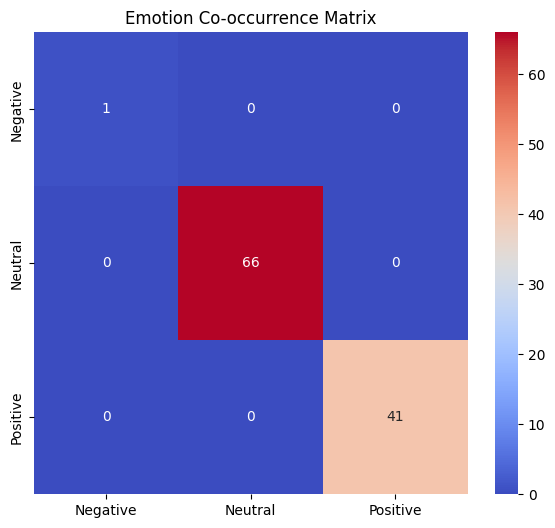

In [120]:
# Assuming 'Emotion' column contains a list of emotions, or you can split the emotions in the string into a list
mlb = MultiLabelBinarizer()
emotion_encoded = mlb.fit_transform(df['Emotion'].str.split(','))  # Splitting by comma if it's a string
emotion_df = pd.DataFrame(emotion_encoded, columns=mlb.classes_, index=df.index)

# Create co-occurrence matrix
co_occurrence_matrix = emotion_df.T.dot(emotion_df)

# Print the co-occurrence matrix
print("Emotion Co-occurrence Matrix:")
print(co_occurrence_matrix)

# Plot heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm')
plt.title('Emotion Co-occurrence Matrix')
plt.show()

**Interpretations:**

The **Emotion Co-occurrence Matrix** reveals distinct patterns in how emotions are reported in the dataset. The matrix shows that **'Negative'** emotions occur alone, with a co-occurrence value of **1**, suggesting they do not combine with other emotions. Similarly, **'Neutral'** emotions appear predominantly by themselves, as indicated by the co-occurrence value of **66**, meaning they are frequently reported without accompanying **'Negative'** or **'Positive'** emotions. The **'Positive'** emotions also show a high co-occurrence value of **41**, reflecting that they are often recorded independently. This analysis highlights that emotions in the dataset tend to be reported individually rather than in combination, with **'Neutral'** and **'Positive'** emotions showing a strong tendency to occur without the presence of other emotions.

## **Interactive Plots**

In [121]:
#Latent Dirichlet Allocation (LDA)

# Combine 'Question' and 'Answer' into one text feature
combined_text = df['Question'] + ' ' + df['Answer']

# Vectorize text data
vectorizer = CountVectorizer(stop_words='english')
text_vectorized = vectorizer.fit_transform(combined_text)

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_vectorized)

# Visualize the topics using the updated method
panel = pyLDAvis.lda_model.prepare(lda, text_vectorized, vectorizer, mds='tsne') # Use lda_model instead of sklearn
pyLDAvis.display(panel)

**Allocation (LDA) model visualized with pyLDAvis**

**1. Intertopic Distance Map:**

Circles: Each circle represents a topic. The size of the circle indicates the prevalence of the topic within the corpus.
Distance: The distance between circles represents the similarity between topics. Closer circles indicate more similar topics.

**2. Relevance Metric (Lambda):**

Slider: Adjust the lambda slider to balance between term frequency within a topic (lambda = 0) and term exclusivity to a topic (lambda = 1).
Interpretation: A higher lambda emphasizes terms that are unique to a topic, while a lower lambda shows more common terms within a topic.

**3. Topic Word List:**

Top Words: For each selected topic, the right panel displays the most relevant terms. The red bars show the frequency of each term in the selected topic, while the blue bars show the overall frequency of the term in the corpus.

**4. Understanding Topics:**

Explore: Select different topics on the map and adjust the lambda slider to understand the key themes and terms associated with each topic.
Interpretation: Interpret the topics based on the combination of relevant terms. For example, a topic with terms like "platform," "connect," and "friends" might be interpreted as a topic about social interaction.

**5. Applying Insights:**

**Document Classification**: You can use the LDA model to classify new documents into the identified topics.

**Feature Engineering:** The topic distributions for each document can be used as additional features in other machine learning models.

**Content Analysis**: LDA can help you uncover hidden patterns and themes within your text data.

LDA is a probabilistic model, so the interpretation of topics is subjective and requires domain knowledge.

## **Conclusion and Recommendations for Further Research**

**Conclusion:**

The analysis of the RPW (Role Play World) dataset provides valuable insights into the sentiments and experiences of users engaged in role-playing activities on social media platforms. RPW, where users adopt roles related to personas like Korean and Japanese idols or anime characters, creates an environment for anonymous interaction. Sentiment analysis reveals an overall **positive outlook** with an average sentiment score of **0.134**, indicating generally favorable user experiences. The sentiment range of **-0.250 to 0.800** highlights a spectrum of experiences from negative to highly positive. This positivity aligns with the online disinhibition effect, allowing users to express themselves more freely than in real life.

Further analysis shows variation in sentiment among individual respondents, with the **FIFTH RESPONDENT** reporting higher positivity compared to the **SECOND RESPONDENT**. A **13.35% increase** in sentiment positivity in the second interview suggests users felt more **comfortable** and **connected** during subsequent interactions. This improvement reflects the opportunity for users to share emotions in a setting that transcends real-life constraints. Despite a weak **negative correlation** (-0.028) between years of experience and sentiment, indicating that the length of RPW use does not significantly affect sentiment, the findings affirm RPW's role as a platform for **personal expression** and **skill development**. RPW is not just an entertainment platform but a medium for significant personal growth and social engagement.

**Recommendations for Further Research**

- **Identify Sentiment Influencers:** Investigate factors influencing sentiment differences among various respondent groups, including engagement levels and demographics.
   
- **Conduct Longitudinal Studies:** Track changes in sentiment over time to understand how prolonged RPW use affects user experiences.

- **Compare Anonymity Effects:** Explore the impact of anonymity on user behavior across different online platforms for broader insights.

- **Analyze Feedback Patterns:** Examine user feedback and interaction patterns to understand how anonymity impacts behavior and sentiment.

- **Expand Sample Diversity:** Increase the sample size and diversity in future studies to enhance representativeness and generalizability.

- **Investigate Platform Features:** Assess how specific RPW features influence user sentiment and engagement to guide improvements.

- **Examine Social Interactions:** Research how anonymity affects social bonds and engagement within RPW and its influence on sentiment.

## **References**

1. Teo, K., Oksanen, A., & Räsänen, P. (2015). Who prefers anonymous self-expression online? A survey-based study of Finns aged 15–30 years. *Information, Communication & Society, 18*(6), 717-732. https://doi.org/10.1080/1369118X.2014.991342

2. Arcelus, J., Bouman, W. P., & Van den Noortgate, W. (2017). Systematic review and meta-analysis of prevalence studies in transsexualism. *European Psychiatry, 45*, 103–115. https://doi.org/10.1016/j.eurpsy.2017.06.005

3. Mauri, M., Cipresso, P., Balgera, A., Villamira, M., & Riva, G. (2011). Why is Facebook so successful? Psychophysiological measures describe a core flow state while using Facebook. *Cyberpsychology, Behavior, and Social Networking, 14*(12), 723–731. https://doi.org/10.1089/cyber.2010.0377

4. Dzogbenuku, R. K., Doe, J. K., & Amoako, G. K. (2022). Social media information and student performance: The mediating role of hedonic value (entertainment). *Journal of Research in Innovative Teaching & Learning, 15*(1), 132-146.

5. Jarman, H. K., Marques, M. D., McLean, S. A., Slater, A., & Paxton, S. J. (2021). Motivations for social media use: Associations with social media engagement and body satisfaction and well-being among adolescents. *Journal of Youth and Adolescence, 50*, 2279–2293.

6. Liu, F., Deng, H., Zhang, Q., Fang, Q., Liu, B., Yang, D., Tian, X., & Wang, X. (2022). Symptoms of internet gaming disorder among male college students in Nanchong, China. *BMC Psychiatry, 22*, 142.

7. Donnelly, G. E., Ksendzova, M., Howell, R. T., Vohs, K. D., & Baumeister, R. F. (2016). Buying to blunt negative feelings: Materialistic escape from the self. *Review of General Psychology, 20*(3), 272–316.

8. Jouhki, H., Savolainen, I., Sirola, A., & Oksanen, A. (2022). Escapism and Excessive Online Behaviors: A Three-Wave Longitudinal Study in Finland during the COVID-19 Pandemic. *International Journal of Environmental Research and Public Health, 19*(19), 12491. https://doi.org/10.3390/ijerph191912491

9. Serrano-Puche, J. (2020). Affect and the expression of emotions on the internet: An overview of current research. In *Second International Handbook of Internet Research* (pp. 529-547).

10. Appel, H., & Gerlach, A. L. (2016). The social self-esteem inventory: Assessing online and offline self-esteem. *Computers in Human Behavior, 63*, 918-926.

11. Sousa, S., & Lamas, D. (2011). Emerging trust patterns in online communities. In F. Xia, Z. Chen, G. Pan, L. T. Yang, & J. Ma (Eds.), *Proceedings of the 4th IEEE International Conference on Cyber, Physical and Social Computing: CPSCom 2011* (pp. 313-317). IEEE Computer Society.

12. Suler, J. (2004). The online disinhibition effect. *Cyberpsychology & Behavior, 7*(3), 321-326.

13. Smith-Merry, J., Goggin, G., Campbell, A., McKenzie, K., Ridout, B., & Baylosis, C. (2019). Social connection and online engagement: Insights from interviews with users of a mental health online forum. *JMIR Mental Health, 6*(3), e11084.

14. Highton-Williamson, E., Priebe, S., & Giacco, D. (2015). Online social networking in people with psychosis: A systematic review. *International Journal of Social Psychiatry, 61*(1), 92-101.

15. Naslund, J. A., Aschbrenner, K. A., & Bartels, S. J. (2016). How people with serious mental illness use smartphones, mobile apps, and social media. *Psychiatric Rehabilitation Journal, 39*(4), 364.

16. Barak, A., Boniel-Nissim, M., & Suler, J. (2008). Fostering empowerment in online support groups. *Computers in Human Behavior, 24*(5), 1867-1883.

17. Thomas, N., Farhall, J., Foley, F., Leitan, N. D., Villagonzalo, K. A., Ladd, E., ... & Kyrios, M. (2016). Promoting personal recovery in people with persisting psychotic disorders: Development and pilot study of a novel digital intervention. *Frontiers in Psychiatry, 7*, 196.

18. Orth, U., Robins, R. W., & Widaman, K. F. (2012). Life-span development of self-esteem and its effects on important life outcomes. *Journal of Personality and Social Psychology, 102*(6), 1271–1288. https://doi.org/10.1037/a0025558

**Copyright © 2024 by Heroshi Joe Abejuela. All rights reserved. Unauthorized distribution or reproduction of this work is prohibited and may be subject to legal penalties.**